In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [2]:
import re

REGEX_INRTO = "Í≥†Í∞ùÎãòÏùÄ \w\wÎãòÍ≥º \d+ÎÖÑ \d+Ïõî \d+ÏùºÎ∂ÄÌÑ∞ Ï¥ù \d+Í∞úÏùò Î©îÏÑ∏ÏßÄÎ•º Ï£ºÍ≥† Î∞õÏïòÏäµÎãàÎã§. "
REGEX_NEWLINE = "\n"
REGEX_DATE = "\d\d\d\dÎÖÑ \d+Ïõî \d+Ïùº [ÏõîÌôîÏàòÎ™©Í∏àÌÜ†Ïùº]ÏöîÏùº"
REGEX_TIME_NAME = "\w\w \d+:\d+, \w\w : "
REGEX_LAUGH = "„Öã+"
REGEX_CRY = "[„Ö†„Öú]+"
REGEX_URL = "http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$\-@\.&+:\/?=]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
REGEX_SEARCH = "ÏÉµÍ≤ÄÏÉâ : #"


with open("messages.txt", "r") as f:
    message = f.read()
    
REGEX = '|'.join(
    [REGEX_INRTO,
     REGEX_NEWLINE,
     REGEX_DATE,
     REGEX_TIME_NAME,
     REGEX_LAUGH,
     REGEX_CRY,
     REGEX_URL,
     REGEX_SEARCH,])

result = re.sub(REGEX, '', message.replace(REGEX_NEWLINE, ' '))
print(result)

# messages.txt
#Í≥†Í∞ùÎãòÏùÄ Í∏∏ÏàúÎãòÍ≥º 2022ÎÖÑ 10Ïõî 16ÏùºÎ∂ÄÌÑ∞ Ï¥ù 24893Í∞úÏùò Î©îÏÑ∏ÏßÄÎ•º Ï£ºÍ≥† Î∞õÏïòÏäµÎãàÎã§. 
#
#
#
#
#2021ÎÖÑ 12Ïõî 14Ïùº ÌôîÏöîÏùº
#Ïò§Ï†Ñ 11:01, Í∏∏Îèô : ÏïàÎÖïÌïòÏÑ∏Ïöî~ Ïù∏Ï≤úÎåÄÌïôÍµê Î≥¥ÎìúÍ≤åÏûÑÎèôÏïÑÎ¶¨
#ÎßàÎãàÎòêÏùò ÏöîÏ†ïÏûÖÎãàÎã§üßû‚Äç‚ôÄÔ∏è
#2021 Î≥¥Ïù∏Îã§ Ïó†Ìã∞ ÎßàÎãàÎòê Î∞∞Ï†ï Í≤∞Í≥ºÎ•º Î∞úÌëúÌï©ÎãàÎã§!
#Ïò§ÌõÑ 11:01, Í∏∏Îèô : ÎèôÏòÅÏÉÅ
#Ïò§ÌõÑ 11:33, Í∏∏Ïàú : Ïñ¥ÎßàÏïÑÏïó
#Ïò§ÌõÑ 11:33, Í∏∏Ïàú : ÎßàÎãàÎòêÏù∏Í∞ÄÏöî? ^^


Ôªø      ÏïàÎÖïÌïòÏÑ∏Ïöî~ Ïù∏Ï≤úÎåÄÌïôÍµê Î≥¥ÎìúÍ≤åÏûÑÎèôÏïÑÎ¶¨ ÎßàÎãàÎòêÏùò ÏöîÏ†ïÏûÖÎãàÎã§üßû‚Äç‚ôÄÔ∏è 2021 Î≥¥Ïù∏Îã§ Ïó†Ìã∞ ÎßàÎãàÎòê Î∞∞Ï†ï Í≤∞Í≥ºÎ•º Î∞úÌëúÌï©ÎãàÎã§! ÎèôÏòÅÏÉÅ Ïñ¥ÎßàÏïÑÏïó ÎßàÎãàÎòêÏù∏Í∞ÄÏöî? ^^ üßû‚Äç‚ôÄÔ∏è üßû‚Äç‚ôÄÔ∏è üßû‚Äç‚ôÄÔ∏è ÌòúÎØ∏ÌöêÎãò ^^ ÌôïÏù∏ÌñàÏäµÎãàÎã§ Ï†ÄÏóêÍ≤å ÎÑàÎ¨¥ ÎÜíÏùÄ Î∂ÑÏù¥ ÎßàÎãàÎòêÏù∏Í±∞ ÏïÑÎãåÍ∞ÄÏöî? ÎûúÎç§ ÏûòÎ™ª ÎèåÎ¶∞ ÎÑ§Ïù¥Î≤ÑÎ•º ÌÉìÌïòÏãúÎ©¥ Îê©ÎãàÎã§ ÏïÑÏù¥Íµ¨~~ ÏïåÍ≤†ÏäµÎãàÎã§~ ÏïÑÎ¨¥Ìäº Ï¶êÍ±∞Ïö¥ Ïó†Ìã∞ ÎêòÏÑ∏Ïöî~üßû‚Äç‚ôÄÔ∏è Í≥†ÏÉùÏù¥ ÎßéÏúºÏã≠ÎãàÎã§ ÎÑ§ ^^    ÏßÄÌù¨ ÌöêÎãò ÌòπÏãú Ïù¥Î≤à ÌöåÏùòÎäî Ï∞∏Ïó¨ Î∂àÍ∞ÄÌïòÏã†Í∞ÄÏöî? ÎÑ§ÎÑ§ Î∂àÍ∞ÄÎä•Ìï©ÎãàÎã§ ÏÉùÏùºÎïåÎ¨∏Ïóê ÌíÄÎ°ú ÏïΩÏÜçÏù¥ Ïû°ÌòÄÏÑúÏöî Îã§Ïùå ÌöåÏùòÎïå Ï∞∏Ïó¨ÌïòÍ≤†ÏäµÎãàÎã§ ÏïÑÏù¥Íµ¨  ÎÑ§ Í∑∏Îü¨Î©¥ Ïûò Îã§ÎÖÄÏò§ÏÑ∏Ïöî!! Ï¶êÍ±∞Ïö¥ Ïó∞Ï¥à ÎêòÏãúÍ∏∏~~~ ÎÑ§ÎÑ§! ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏúºÏÑ∏Ïöî~    ÏßÄÌù¨ ÌöêÎãò Ïù¥Î™®Ìã∞ÏΩò  Î¨¥Ïä® ÏùºÏù¥Ïã†Í∞ÄÏöî?? Í∑∏Í±∞Í∑∏Í±∞ Ï¥ùÎ¨¥ ÌïòÏã§ÏßÄÎßêÏßÄ Î¨ºÏñ¥Î≥¥Î†§Íµ¨ ÏôîÏäµÎãàÎã§ ÍΩ§ Ï§ëÏöîÌïú Ïó≠Ìï†Ïù¥ÎùºÍµ¨ Îì§ÏóàÏùçÎãàÎã§... ÏïÑÏ£º..

In [3]:
# from konlpy.tag import Okt
# okt = Okt()

ko_doc_noun = result.split()

from collections import Counter

count_noun = Counter(ko_doc_noun)
count_noun.most_common(100)

[('Ïù¥Î™®Ìã∞ÏΩò', 427),
 ('GIF', 345),
 ('SELFIE', 345),
 ('ÌÉúÌò∏', 339),
 ('Ïùë', 314),
 ('ÏïÑ', 280),
 ('Ìóâ', 266),
 ('ÎàÑÎÇò', 253),
 ('ÏÇ¨ÏßÑ', 225),
 ('ÌñÑÎ¨¥', 218),
 ('Í∑ºÎç∞', 189),
 ('Ïö∞ÏõÖ', 154),
 ('ÎÉÖÎã§', 136),
 ('Í∑∏Îû≠', 129),
 ('ÏßÄÍ∏à', 126),
 ('ÌÉúÌò∏~', 125),
 ('Í±∞', 124),
 ('ÎàÑÎÇòÍ∞Ä', 124),
 ('Í≤É', 122),
 ('ÎÇò', 122),
 ('ÌñÑÎ¨¥Îäî', 121),
 ('Í∑∏Îü¨Î©¥', 117),
 ('Ìú¥', 113),
 ('Ïûò', 111),
 ('Îçî', 111),
 ('Í∑∏', 110),
 ('IMAGE', 108),
 ('Ïò§Îäò', 107),
 ('ÏùëÏùë', 107),
 ('Ïàò', 106),
 ('Ïïà', 103),
 ('„Öá„Öá', 102),
 ('Í∑∏ÎûòÏÑú', 98),
 ('STICKER', 95),
 ('ÏÇ¨ÎûëÌï¥', 94),
 ('ÌÉúÌò∏Îäî', 93),
 ('Ï¢Ä', 91),
 ('Îã§', 89),
 ('ÌÉúÌò∏~~', 89),
 ('ÎÇ¥Í∞Ä', 86),
 ('ÏôÄ', 83),
 ('Ïù¥Ï†ú', 76),
 ('Ïùë~', 74),
 ('Ìïú', 73),
 ('„Öá0„Öá', 73),
 ('ÎÑàÎ¨¥', 70),
 ('ÌïòÍ≥†', 66),
 ('Ïò§', 65),
 ('ÏùëÏõÖ', 65),
 ('Í∑∏Î¶¨Í≥†', 64),
 ('ÏùºÎã®', 63),
 ('Î™ª', 62),
 ('ÌñÑÎ¨¥ÎèÑ', 62),
 ('ÎÇòÎäî', 61),
 ('ÎÇ¥Ïùº', 61),
 ('Îòê', 60),
 ('ÌñÑÎ¨¥Í∞Ä', 60),
 ('ÏïÑÏïÑ', 59),
 ('ÌÉúÌ

In [8]:
stopword_list = ['Ïù¥Î™®Ìã∞ÏΩò', 'GIF', 'SELFIE', 'ÏÇ¨ÏßÑ', 'IMAGE', 'STICKER']

for word in count_noun:
    if len(word) == 1: # Ìïú Í∏ÄÏûê ÏßúÎ¶¨ÎèÑ ÏóÜÏï†Îäî Í≤å Îçî ÏòàÏÅòÍ≤å ÎÇòÏò®Îã§.
        stopword_list.append(word)
        
#stopword_list[-5:]

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [9]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#count_noun = dict(count_noun)
type(dict(count_noun)) # generate_from_frequencies Îäî ÎîïÏÖîÎÑàÎ¶¨ ÌÉÄÏûÖÏùÑ Î∞õÎäîÎã§.


dict

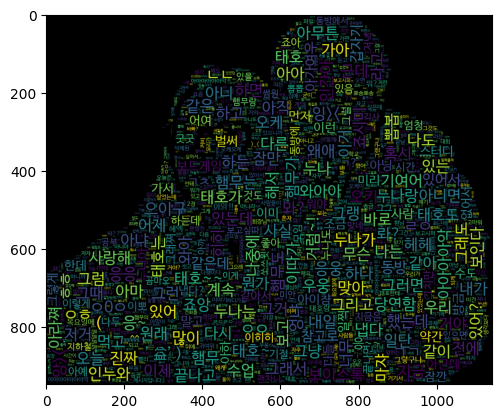

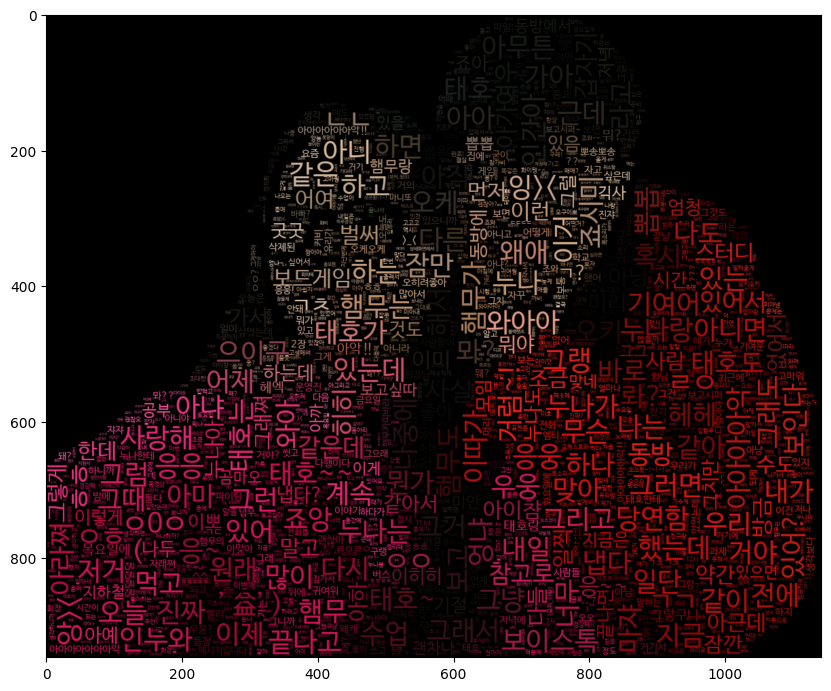

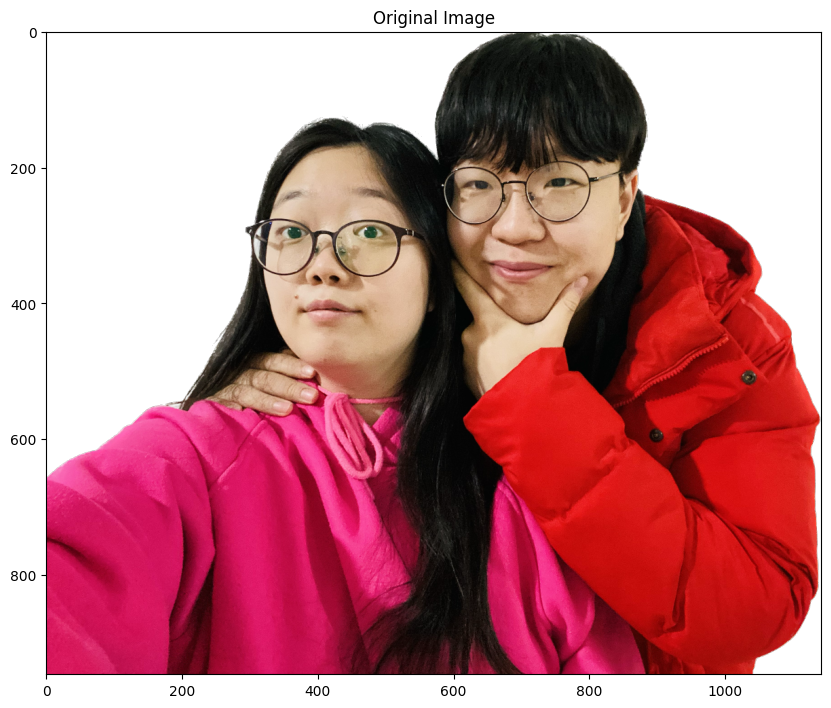

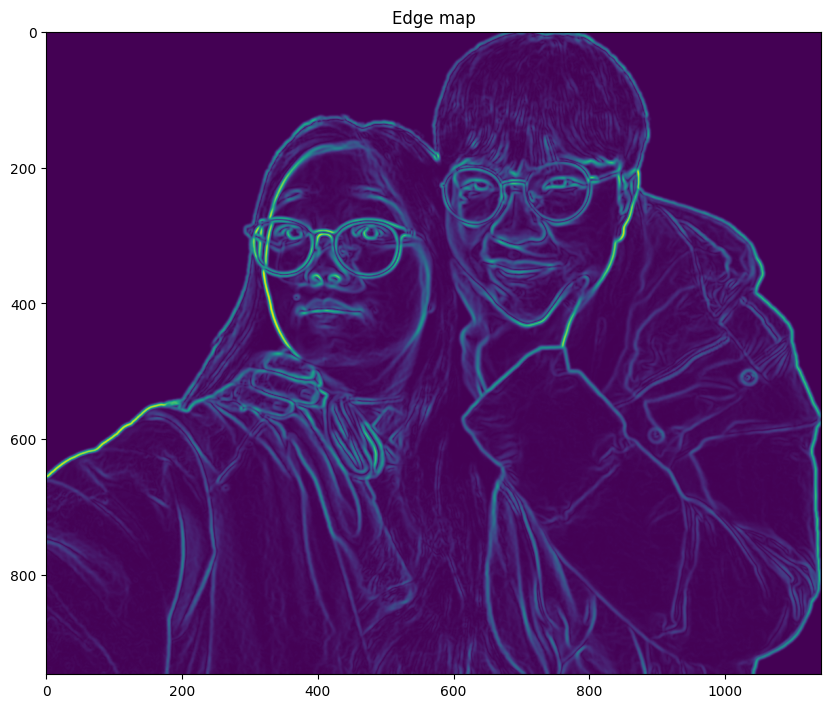

In [10]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = count_noun
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
oort_cloud_color = np.array(Image.open(os.path.join(d, "background.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
oort_cloud_color = oort_cloud_color[::3, ::3]

# create mask  white is "masked out"
oort_cloud_mask = oort_cloud_color.copy()
oort_cloud_mask[oort_cloud_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(oort_cloud_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
oort_cloud_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, font_path='/Library/Fonts/NanumBarunGothic.ttf', mask=oort_cloud_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate_from_frequencies(text)
#wc.generate(text)
plt.imshow(wc) # Ïù¥Ï†ú Ïó¨Í∏∞Ïóê ÏÉâÏùÑ ÏûÖÌûê Í±∞Ïïº!

# create coloring from image
image_colors = ImageColorGenerator(oort_cloud_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("oort_cloud.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(oort_cloud_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

with open("oort_cloud.svg", "w") as text_file:
    text_file.write(wc.to_svg())